In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fire_df = pd.read_excel ('Fire Incurred.xlsx')
liab_df = pd.read_excel ('Liability Incurred.xlsx')
other_df = pd.read_excel ('Other Incurred.xlsx')
water_df = pd.read_excel('Water Incurred.xlsx')
wind_df = pd.read_excel('Wind Incurred.xlsx')

In [4]:
#The number of claims calculated

print (len(fire_df) + len(liab_df) +len(other_df)+len(water_df)+len(wind_df))
print (len(water_df))

4822
1980


In [52]:
#To show how each dataframe looks like

liab_df

,Loss Date,Location of Loss,Loss Reserve,LAE Reserve,Total Reserves,Previous Reserves,Sedgwick Fees,Loss Paid,LAE Paid,Recoveries,...,This month Recoveries,Total LAE Paid,Net Loss Paid,This moth Total Paid,Total Paid,Deductible,Incurred,This month incurred total for Summary risk(total reserve + paid),Loss Type,Description
0,2012-10-29,"163-09 22ND AVE, WHITESTONE, NY 11357 - JIMMY ...",0.0,0.0,0.0,0.0,449.0,0.0,406.05,0.0,...,0,0.0,0,0.0,855.05,-1.0,855.05,0.0,PROPERTY DAMAGE - GL,Hurrican Sandy - Insured tree fell on roof of ...
1,2012-10-29,"40-31 203TH ST., BAYSIDE, NY 11361",0.0,0.0,0.0,0.0,449.0,0.0,999.15,0.0,...,0,0.0,0,0.0,1448.15,-1.0,1448.15,0.0,PROPERTY DAMAGE - GL,CAT 90 - Tree fell on insured`s roof.
2,2012-11-07,"43-56 171ST, FLUSHING, NY",0.0,0.0,0.0,0.0,797.0,0.0,410.65,0.0,...,0,0.0,0,0.0,1207.65,-1.0,1207.65,0.0,BODILY INJURY - GL,CLMT ALLEGES A TREE FELL DUE TO HURRICANE AND ...
3,2013-01-24,"38-09 111TH STREET, NY",0.0,0.0,0.0,0.0,797.0,0.0,12322.74,0.0,...,0,0.0,0,0.0,13119.74,-1.0,13119.74,0.0,BODILY INJURY - GL,CLMT ALLEGEDLY SLIPPED AND FELL ON SIDEWALK AN...
4,2013-04-06,"2784 SAMPSON AVENUE, BRONX, NY",0.0,0.0,0.0,0.0,797.0,25000.0,9473.99,0.0,...,0,0.0,0,0.0,35270.99,-1.0,35270.99,0.0,BODILY INJURY - GL,CLMT ALLEGEDLY TRIPPED AND FELL ON SIDEWALK AN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2020-09-23,9219 95th Street Woodhaven NY,42000.0,12000.0,54000.0,0.0,0.0,0.0,0.00,0.0,...,0,0.0,0,0.0,0.00,0.0,54000.00,54000.0,General Liability Other,Insured's tenant received New York County Su...
458,2019-07-06,12311 Inwood St Jamaica NY,42000.0,2000.0,44000.0,0.0,0.0,0.0,0.00,0.0,...,0,0.0,0,0.0,0.00,0.0,44000.00,44000.0,General Liability Other,Claimant alleges they were attacked by dog tha...
459,2020-01-03,7227 Calanmus Aenue Woodside NY,42000.0,2000.0,44000.0,0.0,0.0,0.0,0.00,0.0,...,0,0.0,0,0.0,0.00,0.0,44000.00,44000.0,General Liability Other,Wife fell off chair and injured her neck
460,2020-11-01,433 Delafield Avenue Staten Island NY,42000.0,2000.0,44000.0,0.0,0.0,0.0,0.00,0.0,...,0,0.0,0,0.0,0.00,0.0,44000.00,44000.0,General Liability Other,Trip and Fall.


# Trend

To see if there is a trend of incurred losses in each peril, scatterplots and linear regressions are shown below.

Text(0.5, 1.0, 'Liability')

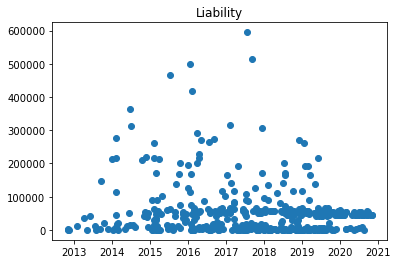

In [53]:
from sklearn.linear_model import LinearRegression
from scipy import stats

#scatter plot of liability claims
plt.scatter(liab_df['Loss Date'], liab_df['Incurred'])
plt.title('Liability')

Text(0.5, 1.0, 'Fire')

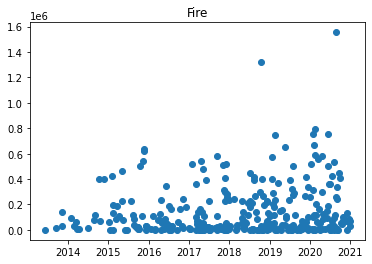

In [54]:
#scatter plot of fire claims
plt.scatter(fire_df['Loss Date'], fire_df['Incurred'])
plt.title('Fire')

Text(0.5, 1.0, 'Water')

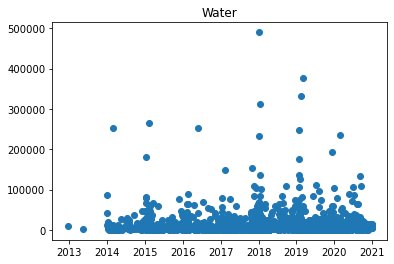

In [55]:
#scatter plot of water claims
plt.scatter(water_df['Loss Date'], water_df['Incurred'])
plt.title('Water')

Text(0.5, 1.0, 'Wind')

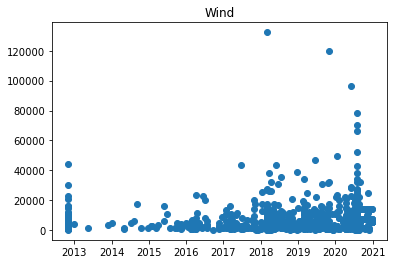

In [56]:
#scatter plot of wind claims
plt.scatter(wind_df['Loss Date'], wind_df['Incurred'])
plt.title('Wind')

Text(0.5, 1.0, 'Other')

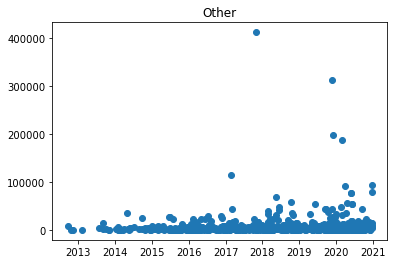

In [57]:
#scatter plot of the other claims
plt.scatter(other_df['Loss Date'], other_df['Incurred'])
plt.title('Other')

# Monte Carlo Simulation

### Liability claims

In [58]:
import array

n = 5000 #The number of simulation
s = 100 #The number of samples

test_df = pd.DataFrame(index = range(n))
test_l = []

for i in range (n):
    sample = np.random.choice (liab_df['Incurred'], s)
    
    mean = sample.mean()
    
    test_l.append(mean)
    

In [59]:
#The mean of 10,000 simulations is below:

sum(test_l)/len(test_l)

51732.86217382015

(array([  2.,   5.,   9.,  15.,  38.,  67., 114., 142., 228., 220., 284.,
        349., 386., 411., 402., 373., 354., 327., 276., 250., 206., 143.,
        110.,  88.,  69.,  46.,  29.,  13.,  19.,   9.,   6.,   4.,   1.,
          1.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([28661.0706  , 30216.635835, 31772.20107 , 33327.766305,
        34883.33154 , 36438.896775, 37994.46201 , 39550.027245,
        41105.59248 , 42661.157715, 44216.72295 , 45772.288185,
        47327.85342 , 48883.418655, 50438.98389 , 51994.549125,
        53550.11436 , 55105.679595, 56661.24483 , 58216.810065,
        59772.3753  , 61327.940535, 62883.50577 , 64439.071005,
        65994.63624 , 67550.201475, 69105.76671 , 70661.331945,
        72216.89718 , 73772.462415, 75328.02765 , 76883.592885,
        78439.15812 , 79994.723355, 81550.28859 , 83105.853825,
        84661.41906 , 86216.984295, 87772.54953 , 89328.114765,
        90883.68    ]),
 <BarContainer object of 40 artists>)

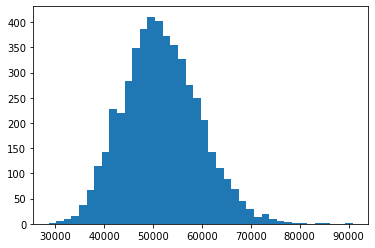

In [60]:
plt.hist(test_l, bins = 40)

In [61]:
#The mean of incurred losses from 2012 to 2019 is below:

liab_df['Incurred'].mean()

51891.670974026

In [62]:
#The median of 10,000 simulations

np.percentile(test_l, 50)

51290.06305

Text(0.5, 1.0, 'Liability')

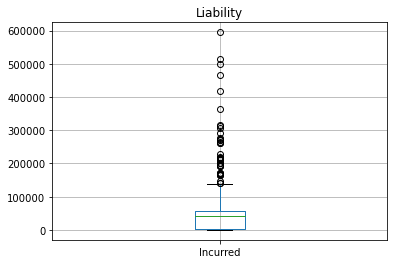

In [63]:
liab_df.boxplot(column = 'Incurred').set_title('Liability')

In [64]:
maxi, mini = boxsummary(liab_df['Incurred'])

print(maxi)
print(mini)

139761.515
-80795.525


(array([  2.,   3.,   6.,   9.,  16.,  19.,  31.,  61., 102., 143., 201.,
        256., 399., 440., 533., 642., 687., 719., 777., 729., 689., 673.,
        583., 520., 421., 344., 288., 210., 172., 105.,  80.,  51.,  37.,
         23.,  10.,   9.,   3.,   5.,   1.,   1.]),
 array([19755.6993 , 20341.76675, 20927.8342 , 21513.90165, 22099.9691 ,
        22686.03655, 23272.104  , 23858.17145, 24444.2389 , 25030.30635,
        25616.3738 , 26202.44125, 26788.5087 , 27374.57615, 27960.6436 ,
        28546.71105, 29132.7785 , 29718.84595, 30304.9134 , 30890.98085,
        31477.0483 , 32063.11575, 32649.1832 , 33235.25065, 33821.3181 ,
        34407.38555, 34993.453  , 35579.52045, 36165.5879 , 36751.65535,
        37337.7228 , 37923.79025, 38509.8577 , 39095.92515, 39681.9926 ,
        40268.06005, 40854.1275 , 41440.19495, 42026.2624 , 42612.32985,
        43198.3973 ]),
 <BarContainer object of 40 artists>)

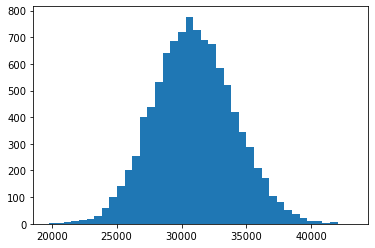

In [69]:
liab_l = dataClean(liab_df['Incurred'])

test_list = monteCarlo(liab_l)

plt.hist(test_list, bins = 40)

In [70]:
# The average of incurred losses of liability claims

sum(test_list)/len(test_list)

30935.204238739872

In [71]:
# The median of incurred losses of liability claims

np.percentile(test_list, 50)

30844.65445

# The same process applied to other types of claims

In [72]:
#A function returning maximum and minimum of boxplot

def boxsummary (series):
    itq = series.quantile(0.75) - series.quantile(0.25)
    
    maximum = series.quantile(0.75) + 1.5*itq
    minimum = series.quantile(0.25) - 1.5*itq
    
    return maximum, minimum

In [73]:
#A function of deleting outliers

def dataClean (series):
    l = []
    
    maximum, minimum = boxsummary(series)
    
    for i in range (len(series)):
        if series[i] >= minimum and series[i] <= maximum:
            l.append(series[i])
            
    return l

In [74]:
#A function of the Monte Carlo simulation

def monteCarlo (l):
    n = 10000 #The number of simulations
    s = 100 #The number of samples drawn
    
    test_list = []
    
    for i in range (n):
        sample = np.random.choice (l, s)
        
        mean = sample.mean()
        
        test_list.append(mean)
        
    return test_list
    

In [75]:
def meanMedian (l):
    mean = sum(l)/len(l)
    median = np.percentile(l, 50)
    
    return mean, median

### Water claims

32752.324999999997 -17253.874999999996
$32752.32이상이 고액사고입니다.


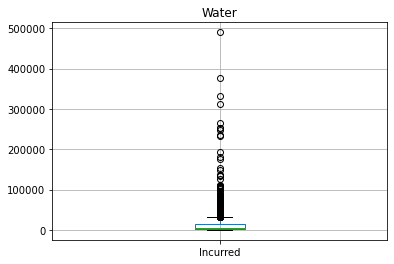

In [109]:
water_df.boxplot(column = 'Incurred').set_title('Water')

maximum, minimum = boxsummary(water_df['Incurred'])

print(maximum, minimum)
max_v = round(maximum, 2)
print("$" + str(max_v) + "이상이 고액사고입니다.")

(array([  4.,   4.,  14.,  14.,  44.,  72.,  83., 150., 245., 352., 375.,
        549., 614., 721., 799., 745., 811., 795., 723., 617., 558., 460.,
        320., 272., 202., 152.,  96.,  69.,  47.,  34.,  23.,  12.,  13.,
          4.,   1.,   3.,   0.,   2.,   0.,   1.]),
 array([ 4692.9165 ,  4840.58123,  4988.24596,  5135.91069,  5283.57542,
         5431.24015,  5578.90488,  5726.56961,  5874.23434,  6021.89907,
         6169.5638 ,  6317.22853,  6464.89326,  6612.55799,  6760.22272,
         6907.88745,  7055.55218,  7203.21691,  7350.88164,  7498.54637,
         7646.2111 ,  7793.87583,  7941.54056,  8089.20529,  8236.87002,
         8384.53475,  8532.19948,  8679.86421,  8827.52894,  8975.19367,
         9122.8584 ,  9270.52313,  9418.18786,  9565.85259,  9713.51732,
         9861.18205, 10008.84678, 10156.51151, 10304.17624, 10451.84097,
        10599.5057 ]),
 <BarContainer object of 40 artists>)

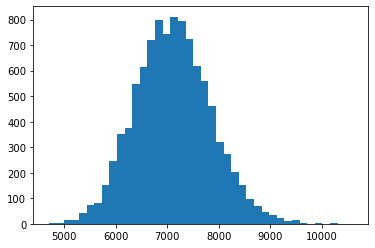

In [77]:
water_l = dataClean(water_df['Incurred'])

water_test_list = monteCarlo(water_l)

plt.hist(water_test_list, bins = 40)

In [78]:
meanMedian(water_test_list)

(7110.144124070002, 7097.124699999999)

(array([  2.,   4.,  28., 112., 220., 417., 604., 795., 875., 925., 881.,
        875., 803., 659., 566., 471., 437., 327., 258., 195., 149., 116.,
         74.,  60.,  33.,  34.,  30.,  13.,   9.,  11.,   4.,   3.,   2.,
          0.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([ 5535.2186 ,  6132.00694,  6728.79528,  7325.58362,  7922.37196,
         8519.1603 ,  9115.94864,  9712.73698, 10309.52532, 10906.31366,
        11503.102  , 12099.89034, 12696.67868, 13293.46702, 13890.25536,
        14487.0437 , 15083.83204, 15680.62038, 16277.40872, 16874.19706,
        17470.9854 , 18067.77374, 18664.56208, 19261.35042, 19858.13876,
        20454.9271 , 21051.71544, 21648.50378, 22245.29212, 22842.08046,
        23438.8688 , 24035.65714, 24632.44548, 25229.23382, 25826.02216,
        26422.8105 , 27019.59884, 27616.38718, 28213.17552, 28809.96386,
        29406.7522 ]),
 <BarContainer object of 40 artists>)

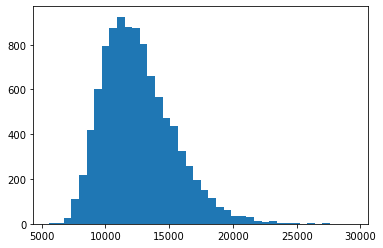

In [79]:
water_pure_test = monteCarlo(water_df['Incurred'])

plt.hist(water_pure_test, bins = 40)

In [80]:
mean, median = meanMedian(water_pure_test)

print("The mean is :", mean, "and the median is: ", median)

The mean is : 12561.598153639981 and the median is:  12195.79825


### Fire/Lightening Claims

503715.39749999996 -286787.2225
$503715.4이상이 고액사고입니다.


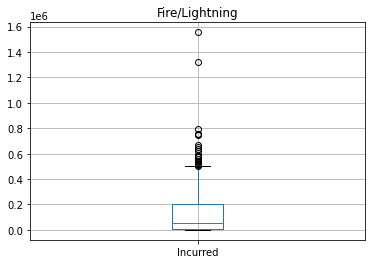

In [110]:
fire_df.boxplot(column = 'Incurred').set_title('Fire/Lightning')

maximum, minimum = boxsummary(fire_df['Incurred'])

print(maximum, minimum)
max_v = round(maximum, 2)
print("$" + str(max_v) + "이상이 고액사고입니다.")

(array([  4.,   8.,  15.,  37.,  40.,  69., 123., 150., 219., 277., 388.,
        407., 505., 628., 683., 714., 707., 737., 680., 655., 580., 518.,
        438., 307., 252., 248., 162., 136., 119.,  68.,  53.,  24.,  25.,
         11.,   4.,   3.,   1.,   3.,   0.,   2.]),
 array([ 62735.5149  ,  64982.986675,  67230.45845 ,  69477.930225,
         71725.402   ,  73972.873775,  76220.34555 ,  78467.817325,
         80715.2891  ,  82962.760875,  85210.23265 ,  87457.704425,
         89705.1762  ,  91952.647975,  94200.11975 ,  96447.591525,
         98695.0633  , 100942.535075, 103190.00685 , 105437.478625,
        107684.9504  , 109932.422175, 112179.89395 , 114427.365725,
        116674.8375  , 118922.309275, 121169.78105 , 123417.252825,
        125664.7246  , 127912.196375, 130159.66815 , 132407.139925,
        134654.6117  , 136902.083475, 139149.55525 , 141397.027025,
        143644.4988  , 145891.970575, 148139.44235 , 150386.914125,
        152634.3859  ]),
 <BarContainer object

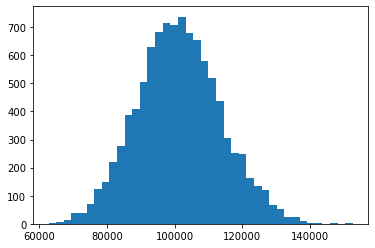

In [82]:
fire_l = dataClean(fire_df['Incurred'])

fire_test_list = monteCarlo(fire_l)

plt.hist(fire_test_list, bins = 40)

In [83]:
mean, median = meanMedian(fire_test_list)

print("The mean is :", mean, "and the median is: ", median)

The mean is : 101317.21709533982 and the median is:  101034.18475


(array([  1.,   1.,   1.,   4.,   7.,  22.,  26.,  40.,  97., 145., 271.,
        311., 387., 551., 672., 727., 813., 785., 792., 757., 714., 592.,
        509., 434., 345., 265., 209., 154., 126.,  76.,  68.,  25.,  28.,
         18.,  11.,   9.,   2.,   2.,   1.,   2.]),
 array([ 67874.2629  ,  71884.225845,  75894.18879 ,  79904.151735,
         83914.11468 ,  87924.077625,  91934.04057 ,  95944.003515,
         99953.96646 , 103963.929405, 107973.89235 , 111983.855295,
        115993.81824 , 120003.781185, 124013.74413 , 128023.707075,
        132033.67002 , 136043.632965, 140053.59591 , 144063.558855,
        148073.5218  , 152083.484745, 156093.44769 , 160103.410635,
        164113.37358 , 168123.336525, 172133.29947 , 176143.262415,
        180153.22536 , 184163.188305, 188173.15125 , 192183.114195,
        196193.07714 , 200203.040085, 204213.00303 , 208222.965975,
        212232.92892 , 216242.891865, 220252.85481 , 224262.817755,
        228272.7807  ]),
 <BarContainer object

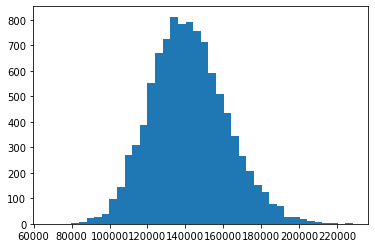

In [84]:
fire_pure_test = monteCarlo(fire_df['Incurred'])

plt.hist(fire_pure_test, bins = 40)

In [85]:
mean, median = meanMedian(fire_pure_test)

print("The mean is :", mean, "and the median is: ", median)

The mean is : 141769.13030088024 and the median is:  140678.32525


### Wind/Hail Claims

19889.967500000006 -9427.212500000003
$19889.97이상이 고액사고입니다.


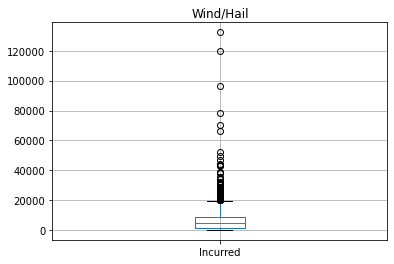

In [111]:
wind_df.boxplot(column = 'Incurred').set_title('Wind/Hail')

maximum, minimum = boxsummary(wind_df['Incurred'])

print(maximum, minimum)
max_v = round(maximum, 2)
print("$" + str(max_v) + "이상이 고액사고입니다.")

(array([  6.,   4.,  13.,  27.,  43.,  45., 108., 123., 216., 313., 388.,
        538., 605., 706., 800., 828., 821., 806., 738., 656., 525., 434.,
        376., 269., 219., 141.,  96.,  56.,  39.,  22.,  15.,  12.,   5.,
          4.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([3887.9339   , 3986.3044575, 4084.675015 , 4183.0455725,
        4281.41613  , 4379.7866875, 4478.157245 , 4576.5278025,
        4674.89836  , 4773.2689175, 4871.639475 , 4970.0100325,
        5068.38059  , 5166.7511475, 5265.121705 , 5363.4922625,
        5461.86282  , 5560.2333775, 5658.603935 , 5756.9744925,
        5855.34505  , 5953.7156075, 6052.086165 , 6150.4567225,
        6248.82728  , 6347.1978375, 6445.568395 , 6543.9389525,
        6642.30951  , 6740.6800675, 6839.050625 , 6937.4211825,
        7035.79174  , 7134.1622975, 7232.532855 , 7330.9034125,
        7429.27397  , 7527.6445275, 7626.015085 , 7724.3856425,
        7822.7562   ]),
 <BarContainer object of 40 artists>)

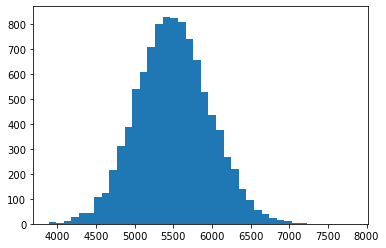

In [87]:
wind_l = dataClean(wind_df['Incurred'])

wind_test_list = monteCarlo(wind_l)

plt.hist(wind_test_list, bins = 40)

In [88]:
mean, median = meanMedian(wind_test_list)

print("The mean is :", mean, "and the median is: ", median)

The mean is : 5498.952418550019 and the median is:  5489.925949999999


(array([  5.,   9.,  17.,  45.,  65.,  95., 186., 294., 393., 526., 646.,
        734., 711., 702., 777., 726., 709., 640., 506., 432., 385., 324.,
        226., 186., 175., 111.,  94.,  67.,  63.,  47.,  34.,  17.,  12.,
         10.,  11.,   8.,   5.,   3.,   1.,   3.]),
 array([ 4423.0144   ,  4596.9499825,  4770.885565 ,  4944.8211475,
         5118.75673  ,  5292.6923125,  5466.627895 ,  5640.5634775,
         5814.49906  ,  5988.4346425,  6162.370225 ,  6336.3058075,
         6510.24139  ,  6684.1769725,  6858.112555 ,  7032.0481375,
         7205.98372  ,  7379.9193025,  7553.854885 ,  7727.7904675,
         7901.72605  ,  8075.6616325,  8249.597215 ,  8423.5327975,
         8597.46838  ,  8771.4039625,  8945.339545 ,  9119.2751275,
         9293.21071  ,  9467.1462925,  9641.081875 ,  9815.0174575,
         9988.95304  , 10162.8886225, 10336.824205 , 10510.7597875,
        10684.69537  , 10858.6309525, 11032.566535 , 11206.5021175,
        11380.4377   ]),
 <BarContainer object

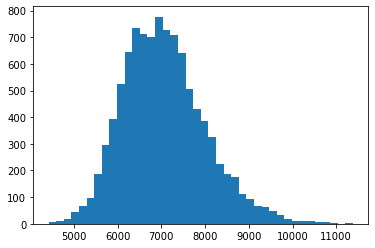

In [89]:
wind_pure_test = monteCarlo(wind_df['Incurred'])

plt.hist(wind_pure_test, bins = 40)

In [90]:
mean, median = meanMedian(wind_pure_test)

print("The mean is :", mean, "and the median is: ", median)

The mean is : 7066.710996790016 and the median is:  6988.4860499999995


### Other Claims

17065.96875 -8443.28125
$17065.97이상이 고액사고입니다.


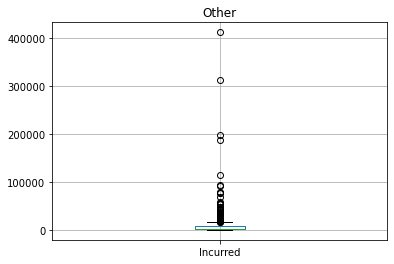

In [112]:
other_df.boxplot(column = 'Incurred').set_title('Other')

maximum, minimum = boxsummary(other_df['Incurred'])

print(maximum, minimum)
max_v = round(maximum, 2)
print("$" + str(max_v) + "이상이 고액사고입니다.")

(array([  1.,   0.,   0.,   0.,   0.,   2.,   2.,   3.,   9.,  15.,  40.,
         54., 101., 184., 235., 315., 426., 534., 678., 796., 816., 812.,
        795., 813., 724., 616., 538., 426., 327., 251., 156., 113.,  88.,
         59.,  27.,  24.,   7.,   5.,   5.,   3.]),
 array([2151.0777  , 2233.029865, 2314.98203 , 2396.934195, 2478.88636 ,
        2560.838525, 2642.79069 , 2724.742855, 2806.69502 , 2888.647185,
        2970.59935 , 3052.551515, 3134.50368 , 3216.455845, 3298.40801 ,
        3380.360175, 3462.31234 , 3544.264505, 3626.21667 , 3708.168835,
        3790.121   , 3872.073165, 3954.02533 , 4035.977495, 4117.92966 ,
        4199.881825, 4281.83399 , 4363.786155, 4445.73832 , 4527.690485,
        4609.64265 , 4691.594815, 4773.54698 , 4855.499145, 4937.45131 ,
        5019.403475, 5101.35564 , 5183.307805, 5265.25997 , 5347.212135,
        5429.1643  ]),
 <BarContainer object of 40 artists>)

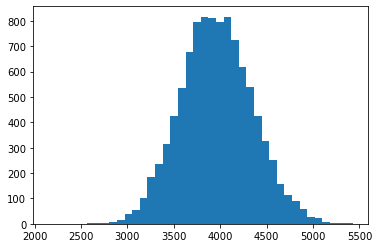

In [92]:
other_l = dataClean(other_df['Incurred'])

other_test_list = monteCarlo(other_l)

plt.hist(other_test_list, bins = 40)

In [93]:
mean, median = meanMedian(other_test_list)

print("The mean is :", mean, "and the median is: ", median)

The mean is : 3960.3741455600234 and the median is:  3951.2902000000004


(array([2.200e+01, 8.400e+01, 2.460e+02, 5.480e+02, 8.170e+02, 1.069e+03,
        1.057e+03, 9.650e+02, 8.140e+02, 6.480e+02, 5.910e+02, 5.010e+02,
        4.400e+02, 3.990e+02, 3.810e+02, 2.580e+02, 2.320e+02, 2.130e+02,
        1.560e+02, 1.280e+02, 8.600e+01, 8.000e+01, 5.900e+01, 4.800e+01,
        3.900e+01, 2.800e+01, 2.600e+01, 1.500e+01, 1.200e+01, 5.000e+00,
        1.000e+01, 4.000e+00, 5.000e+00, 8.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 3498.5351   ,  3932.4811775,  4366.427255 ,  4800.3733325,
         5234.31941  ,  5668.2654875,  6102.211565 ,  6536.1576425,
         6970.10372  ,  7404.0497975,  7837.995875 ,  8271.9419525,
         8705.88803  ,  9139.8341075,  9573.780185 , 10007.7262625,
        10441.67234  , 10875.6184175, 11309.564495 , 11743.5105725,
        12177.45665  , 12611.4027275, 13045.348805 , 13479.2948825,
        13913.24096  , 14347.1870375, 14781.133115 , 15215.0791925,
        15649.02527  , 160

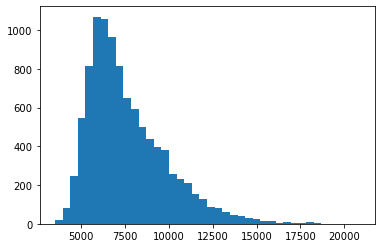

In [94]:
other_pure_test = monteCarlo(other_df['Incurred'])

plt.hist(other_pure_test, bins = 40)

In [95]:
mean, median = meanMedian(other_pure_test)

print("The mean is :", mean, "and the median is: ", median)

The mean is : 7622.315903769993 and the median is:  7070.6996
